<a href="https://colab.research.google.com/github/GabrielaSchmitt/Data-Science-studies/blob/main/Clustering_MNIST_com_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

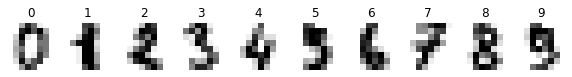

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

In [3]:
n_samples = len(digits.images)

X = digits.data.reshape((n_samples, -1))
y = digits.target

In [4]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [5]:
y[1]

1

In [6]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
X, y = digits.data, digits.target

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
k_digits = KMeans(n_clusters=10)

In [10]:
y_pred = k_digits.fit_predict(X)

In [11]:
y_pred

array([2, 4, 4, ..., 4, 6, 6], dtype=int32)

In [12]:
import numpy as np

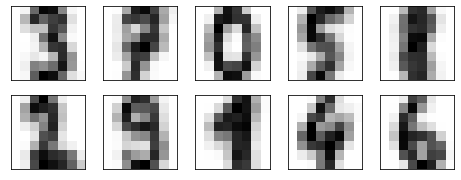

In [13]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(k_digits.cluster_centers_[i],(8,8)), cmap=plt.cm.binary)

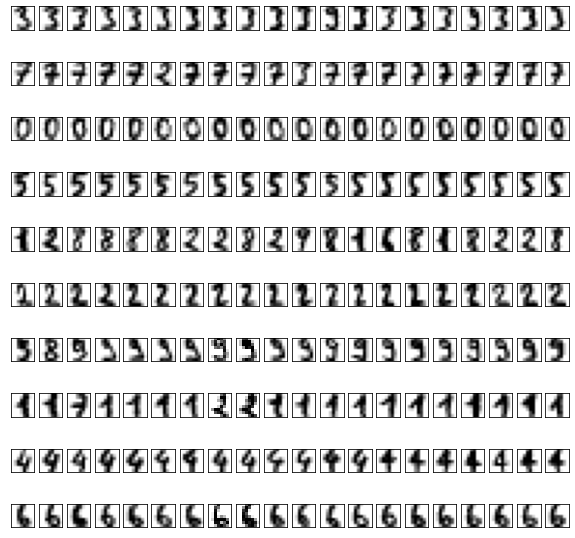

In [14]:
fig = plt.figure(figsize=(10, 10))
for i in range(0, 10):
  idx = np.where(y_pred == i)
  for n in range(0, 20):
    ax = fig.add_subplot(10, 20, (i*20) + n+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X[idx][n],(8,8)), cmap=plt.cm.binary)

In [15]:
labels = [9, 8, 6, 3, 0, 5, 7, 4, 1, 2]

In [16]:
y_pred2 = [labels[y] for y in y_pred]

In [17]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y, y_pred2)

0.01001669449081803

In [20]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
cm = confusion_matrix(y, y_pred2, labels=range(0, 10))
print(cm)

[[  0   1   0   0   0   0 177   0   0   0]
 [ 99   0   2   1  55  24   0   0   0   1]
 [  8   0   0   0   2 148   1   2   3  13]
 [  7   0   0   2   0   0   0  12   7 155]
 [  4 164   0   0   5   0   0   0   8   0]
 [  0   2   1 136   0   0   0  42   0   1]
 [  2   0 177   0   1   0   1   0   0   0]
 [  2   0   0   1   2   0   0   0 174   0]
 [100   0   2   5   6   3   0  52   4   2]
 [  2   0   0   6  20   0   0 139   7   6]]
